In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.stats import poisson
import numpy as np
from scipy.special import factorial

In [2]:
xl_file = pd.ExcelFile("data/GM counter.xlsx")

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

In [3]:
bg = dfs['BACKGROUND'];
src = dfs['SOURCE']
src.head()

,VOLTAGE,COUNTS,Unnamed: 2,VOLTAGE,COUNTS(41s),Unnamed: 5,Cs(137) WITH DUMMY(180s),Unnamed: 7
0,150.0,0.0,NaN,550,989,NaN,VOLTAGE,COUNTS
1,170.0,0.0,NaN,550,980,NaN,550,1556
2,190.0,0.0,NaN,550,957,NaN,NaN,NaN
3,210.0,0.0,NaN,550,1017,NaN,Cs(137) WITH Co(60) (180s),NaN
4,230.0,0.0,NaN,550,988,NaN,VOLTAGE,COUNTS


# PART 1
## Plateau Graph

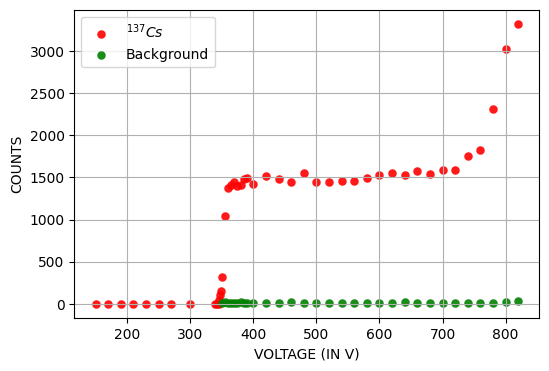

In [4]:
plt.figure(figsize=[6,4])

plt.scatter(src.iloc[:, 0], src.iloc[:, 1], alpha=0.9, linewidths=0.1, color="red", label=r"$^{137}Cs$")

plt.scatter(bg.iloc[:, 0], bg.iloc[:, 1], alpha=0.9, linewidths=0.1, color="green", label = "Background")

plt.xlabel("VOLTAGE (IN V)")
plt.ylabel("COUNTS")
plt.grid()
plt.legend()

In [5]:
## Part 1

def linear(x, m, c):
    return m * x + c

xdata = src.iloc[15:42, 0]  
ydata = src.iloc[15:42, 1]

params = optimize.curve_fit(linear, xdata, ydata,)

print("Slope of plateau: ", params[0][0])
print("Operating Voltage: ", ydata.mean())

Slope of plateau:  0.7475445639444885
Operating Voltage:  1491.0740740740741


# Part 2

## Background Count

In [18]:
bgp = bg.iloc[:, 3:]

for i in range(50, len(bgp["COUNTS.1"])):
    bgp["COUNTS.1"][i] = np.random.poisson(bgp["COUNTS.1"].mean(), 1) ## everytime df is updates and mean is updated too
bgp.head()

/tmp/ipykernel_18983/3306744594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bgp["COUNTS.1"][i] = np.random.poisson(bgp["COUNTS.1"].mean(), 1) ## everytime df is updates and mean is updated too


,VOLTAGE.1,COUNTS.1
0,550,9.0
1,550,10.0
2,550,11.0
3,550,20.0
4,550,7.0


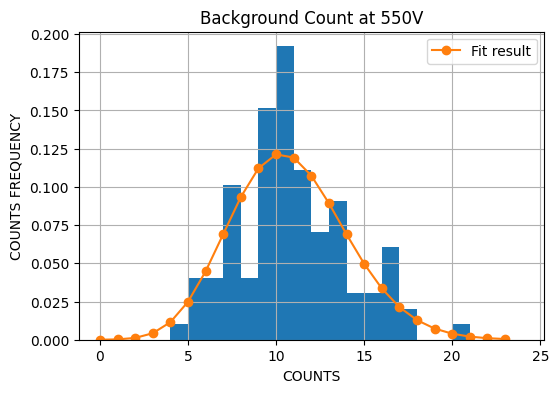

In [25]:
plt.figure(figsize=[6,4])

bins = np.arange(25)
(n, bins, patches) = plt.hist(bgp["COUNTS.1"], bins=bins, density=True)

def poiss(x, mu): ## n = counts, mu = mean
    return mu**x * np.exp(-mu) / factorial(x)

bin_middles = 0.5 * (bins[1:] + bins[:-1])

(mu, params) = optimize.curve_fit(poiss, bin_middles, n)

x_plot = np.arange(0, bin_middles.max())

plt.plot(
    x_plot,
    poiss(x_plot, *mu),
    marker='o', linestyle='-',
    label='Fit result',
)
plt.legend()
plt.title("Background Count at 550V")
plt.ylabel("COUNTS FREQUENCY")
plt.xlabel("COUNTS")
plt.grid()
plt.show()

## Source Count

In [45]:
srcp = src.iloc[:, 4:5]
srcp = srcp.to_numpy()

for i in range(50, 100):
    srcp = np.append(srcp, np.random.poisson(srcp.mean(), 1)) ## everytime df is updates and mean is updated too
srcp.mean()

975.89

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


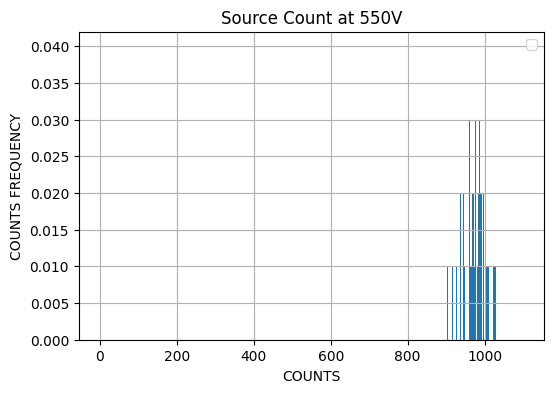

In [53]:
plt.figure(figsize=[6,4])

bins = np.arange(1100)
(n, bins, patches) = plt.hist(srcp, bins=bins, density=True)
plt.legend()
plt.title("Source Count at 550V")
plt.ylabel("COUNTS FREQUENCY")
plt.xlabel("COUNTS")
plt.grid()
plt.show()